In [1]:
# importing the required libraries for logistic regression
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score


In [2]:
# Data Analysis of the dataset
data = pd.read_csv("Leads.csv")

In [3]:
data.shape

(9240, 37)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#checking null values
data.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
# checking null % in column wise
data_null = round((data.isna().sum())/len(data.index)*100,2)
print(data_null[data_null>0])

Lead Source                                       0.39
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Quality                                     51.59
Lead Profile                                     29.32
City                                             15.37
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
dtype: float64


In [9]:
# check in row wise, rows that have more that 30% null
data_null_rows=round(((data.isna().sum(axis=1))/data.shape[1]) * 100,2)
print(data_null_rows[data_null_rows > 30])

963     32.43
1363    32.43
2633    32.43
2635    32.43
2671    35.14
        ...  
7400    32.43
8203    32.43
8216    32.43
8252    32.43
8544    32.43
Length: 645, dtype: float64


In [10]:
# chencking for unique count in dataset
for i in data.columns:
    print(i+'=',len(data[i].unique()))

Prospect ID= 9240
Lead Number= 9240
Lead Origin= 5
Lead Source= 22
Do Not Email= 2
Do Not Call= 2
Converted= 2
TotalVisits= 42
Total Time Spent on Website= 1731
Page Views Per Visit= 115
Last Activity= 18
Country= 39
Specialization= 20
How did you hear about X Education= 11
What is your current occupation= 7
What matters most to you in choosing a course= 4
Search= 2
Magazine= 1
Newspaper Article= 2
X Education Forums= 2
Newspaper= 2
Digital Advertisement= 2
Through Recommendations= 2
Receive More Updates About Our Courses= 1
Tags= 27
Lead Quality= 6
Update me on Supply Chain Content= 1
Get updates on DM Content= 1
Lead Profile= 7
City= 8
Asymmetrique Activity Index= 4
Asymmetrique Profile Index= 4
Asymmetrique Activity Score= 13
Asymmetrique Profile Score= 11
I agree to pay the amount through cheque= 1
A free copy of Mastering The Interview= 2
Last Notable Activity= 16


In [11]:
# as using .describe() 'PROSPECT ID' is int64 as it is already unique
data = data.drop('Prospect ID', axis=1)
# removing more columns which makes no sense or doesnt add up to data frame
data = data.drop('I agree to pay the amount through cheque', axis = 1)
data= data.drop('Get updates on DM Content', axis = 1)
data = data.drop('Magazine', axis = 1)
data = data.drop('Receive More Updates About Our Courses', axis = 1)
data = data.drop('Update me on Supply Chain Content', axis = 1)

In [12]:
data.shape

(9240, 31)

So now it is been reduced from (9240, 37) to (9240, 31)

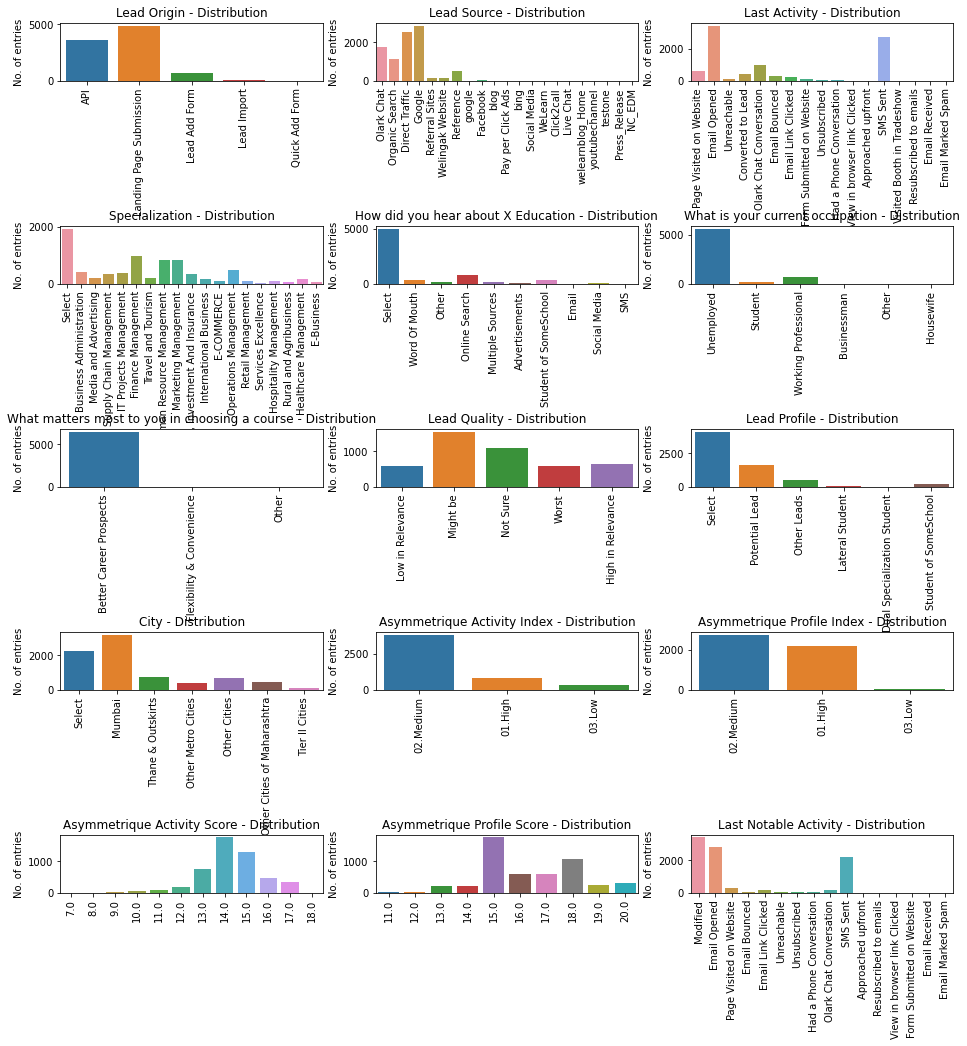

In [13]:
# lets try univariate analysis of categorical variables 
# from the .info() we came to know that there are 7 numeric column and 30 categorical values

# checking the distribution of categorical variables

col_count = ['Lead Origin','Lead Source','Last Activity','Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Lead Quality','Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Last Notable Activity']

# plotting the histogram
plt.figure(figsize=(16,16))
for i in range(len(col_count)):
    plt.subplot(5, 3, i+1)
    var=col_count[i]
    sns.countplot(x=var, data=data)
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 2.5)

In [14]:
# from the above histogram results we can see "SELECT" in 3 variables this is nothing but we can consider as NAN variable
select_var = ['Specialization','How did you hear about X Education','Lead Profile','City']

##Check the Unique values with counts in all remaining fields after replacing with np.NaN
for x in select_var:
    data[x].replace('Select',np.NaN,inplace=True)

In [15]:
# checking the null % and handleing the Nan values
data_null=round((data.isna().sum())/len(data.index) * 100,2)
print(data_null[data_null > 0])

Lead Source                                       0.39
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Quality                                     51.59
Lead Profile                                     74.19
City                                             39.71
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
dtype: float64


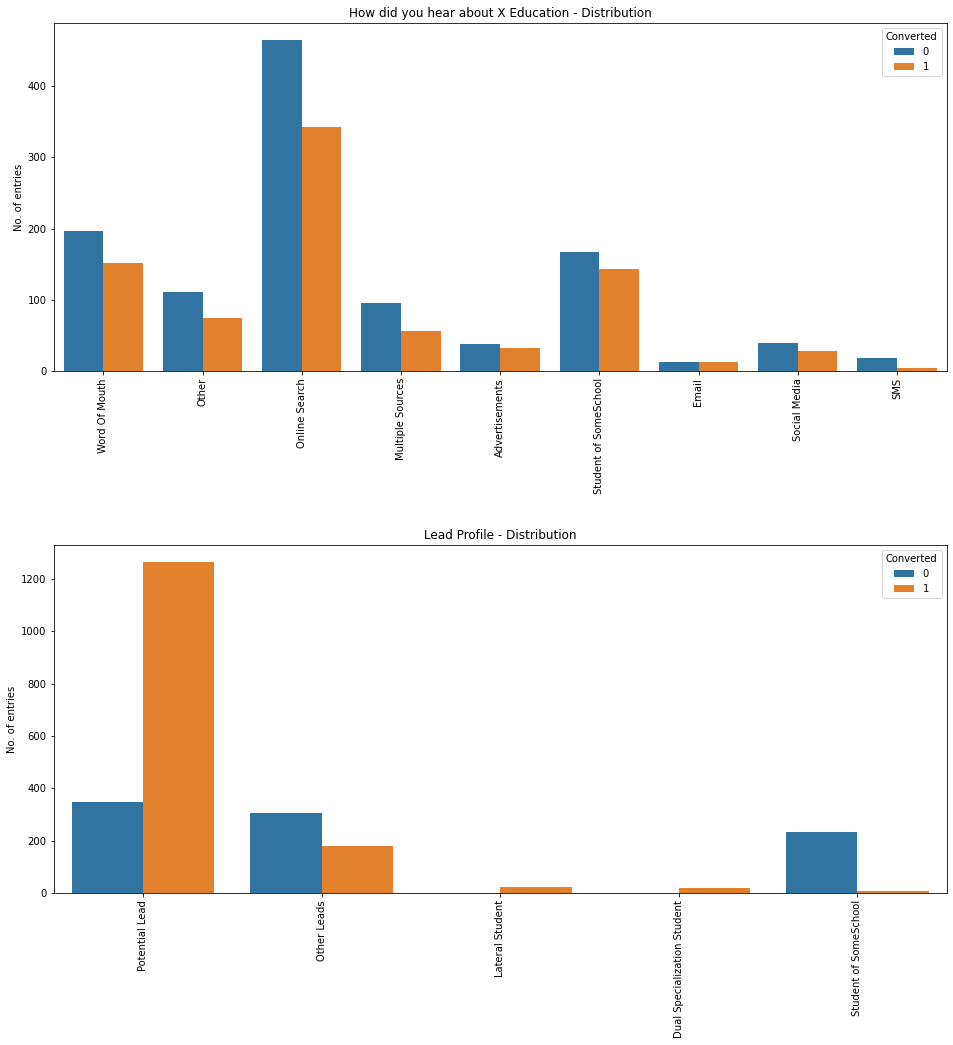

In [16]:
# doing an bivariate analysis of categorical variables

col_cont3 = ['How did you hear about X Education','Lead Profile']
# histogram for these two categorical varibales
plt.figure(figsize=(16,16))
for i in range(len(col_cont3)):
    plt.subplot(2, 1, i+1)
    var=col_cont3[i]
    #sns.countplot(leads_df[var])
    sns.countplot(x= var, hue = 'Converted', data = data)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 0.5)

In [17]:
# now we can drop the columns which has null values more than 50% which adds no values to model
# drop How did you hear about X Education == 78.46
data = data.drop('How did you hear about X Education', axis = 1)

In [18]:
# Now lets check the values of:
"""
Asymmetrique Activity Index
Asymmetrique Profile Index
Asymmetrique Activity Score
Asymmetrique Profile Score
"""
print(data['Asymmetrique Activity Index'].value_counts())
print(data['Asymmetrique Activity Score'].value_counts())
print(data['Asymmetrique Profile Index'].value_counts())
print(data['Asymmetrique Profile Score'].value_counts())

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64
14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64
02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64
15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64


In [19]:
Asymmetrique_list = ['Asymmetrique Activity Index','Asymmetrique Profile Index']
data[Asymmetrique_list] = data[Asymmetrique_list].apply(lambda x: x.map({'01.High':'High','02.Medium':'Medium','03.Low':'Low'}))

print(data['Asymmetrique Activity Index'].value_counts())
print(data['Asymmetrique Profile Index'].value_counts())

Medium    3839
High       821
Low        362
Name: Asymmetrique Activity Index, dtype: int64
Medium    2788
High      2203
Low         31
Name: Asymmetrique Profile Index, dtype: int64


In [20]:
# Drop the Asymmetrique columns 
data=data.drop('Asymmetrique Activity Score',axis=1)
data=data.drop('Asymmetrique Profile Score',axis=1)

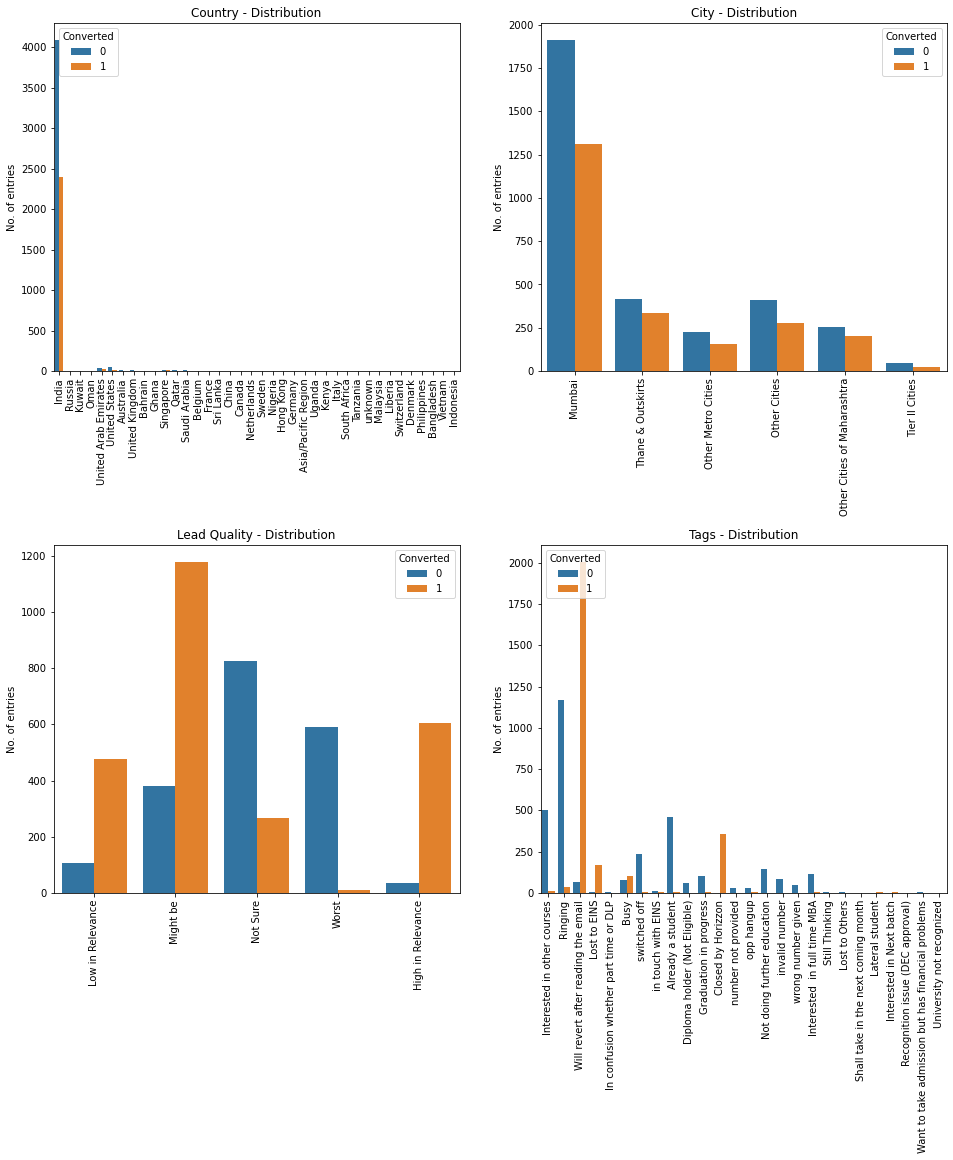

In [21]:
col_count2=['Country','City','Lead Quality','Tags']

# plotting the histogram of all categorical variables
plt.figure(figsize=(16,16))
for i in range(len(col_count2)):
    plt.subplot(2, 2, i+1)
    var=col_count2[i]
    sns.countplot(x= var, hue = 'Converted', data = data)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 0.5)

In [22]:
# From this fistogram we can conclude countries/city doesn't have a major influence over the data
#  So we can drop all the colmns

data = data.drop('Country', axis = 1)
data = data.drop('City', axis = 1)

In [23]:
# checking null % in column wise
data_null = round((data.isna().sum())/len(data.index)*100,2)
print(data_null[data_null>0])

Lead Source                                       0.39
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Quality                                     51.59
Lead Profile                                     74.19
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
dtype: float64


In [24]:
"""
Now if we look into these columns:
TotalVisits                                       1.48
Page Views Per Visit                              1.48
these are almost null lets apply describe function
"""
data[['TotalVisits', 'Page Views Per Visit']].describe()


,TotalVisits,Page Views Per Visit
count,9103.000000,9103.000000
mean,3.445238,2.362820
std,4.854853,2.161418
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
max,251.000000,55.000000


In [25]:
data.loc[data['TotalVisits'] == 3]['Page Views Per Visit'].describe()

count    1306.000000
mean        2.631317
std         0.663631
min         1.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: Page Views Per Visit, dtype: float64

In [26]:
# Impute the NULLs in "TotalVisits" using mean
data['TotalVisits'].fillna((data['TotalVisits'].mean()), inplace=True)

# Impute the NULLs in "Page Views Per Visit" using mean calculated using the "mean value of TotalVisits"
data['Page Views Per Visit'].replace(np.NaN,2.65,inplace=True)

# Check the remaining NULL fields
data_null=round((data.isna().sum())/len(data.index) * 100,2)
print(data_null[data_null > 0])

Lead Source                                       0.39
Last Activity                                     1.11
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Quality                                     51.59
Lead Profile                                     74.19
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
dtype: float64


In [27]:
"""
Similarly Now if we look into these columns:
Lead Source                                       0.39
Last Activity                                     1.11
these are almost null lets apply describe function
"""
data['Lead Source'].fillna((data['Lead Source'].mode()[0]), inplace=True)
data['Last Activity'].fillna((data['Last Activity'].mode()[0]), inplace=True)


In [28]:
# Check the remaining NULL fields
data_null=round((data.isna().sum())/len(data.index) * 100,2)
print(data_null[data_null > 0])

Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Quality                                     51.59
Lead Profile                                     74.19
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
dtype: float64


In [29]:
"""
Now looking into these columns and assigning n.an to:
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
"""
col_cont3 =['What is your current occupation','What matters most to you in choosing a course']

##Check the Unique values with counts in all remaining fields after replacing with np.NaN
for x in col_cont3:
    data[x].replace('Select',np.NaN,inplace=True)


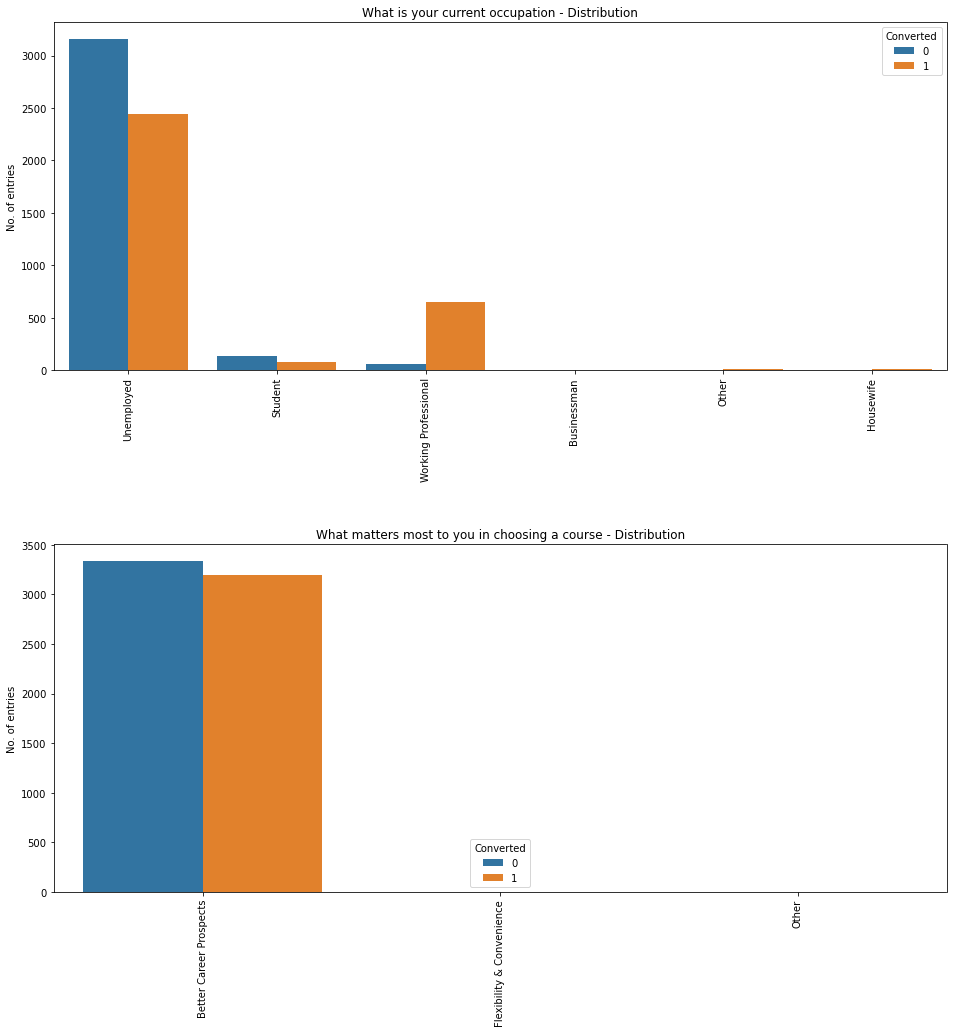

In [30]:
# Visualizing 
plt.figure(figsize=(16,16))
for i in range(len(col_cont3)):
    plt.subplot(2, 1, i+1)
    var=col_cont3[i]
    sns.countplot(x= var, hue = 'Converted', data = data)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 0.5)

In [31]:
"""
From the above histogram we can choose "Better Career Prospects" as it is majority
values present in -- What matters most to you in choosing a course,
But doesnt add a value to data so removing it
"""
data=data.drop('What matters most to you in choosing a course',axis=1)

In [32]:
# replacing Nan values with 'Not-Known'
data['What is your current occupation'].fillna(('Not-Known'), inplace=True)

Text(0.5, 0, '')

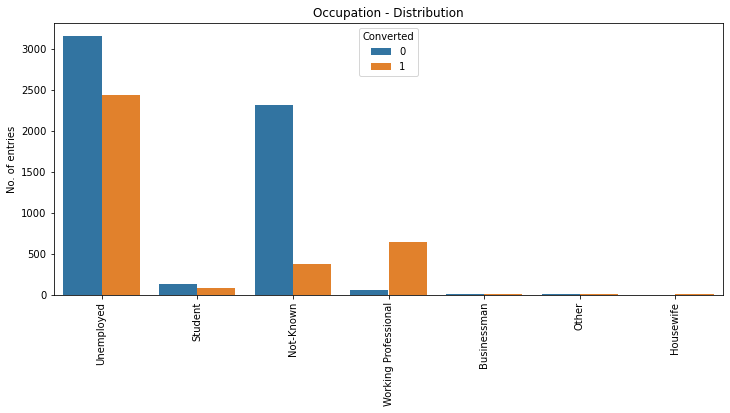

In [33]:
# Visualising the histogram of the distribution of occupation variables
plt.figure(figsize=(12,5))
sns.countplot(x= 'What is your current occupation', hue = 'Converted', data = data)
plt.xticks(rotation=90)
plt.title('Plotting data for target in terms of total count')
plt.title('Occupation - Distribution')
plt.ylabel('No. of entries')
plt.xticks(rotation=90)
plt.xlabel(None)

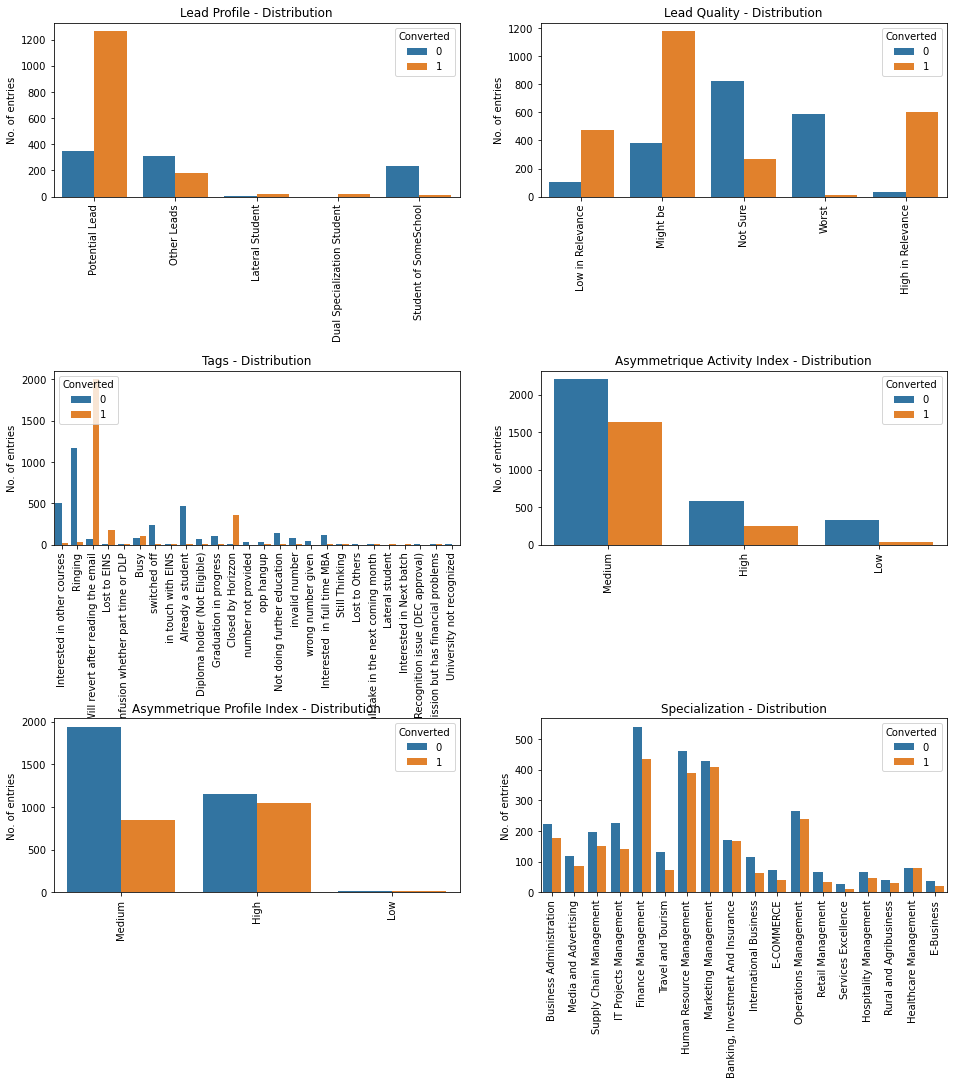

In [34]:
# checking the same for other categorical variables
col_count4=['Lead Profile','Lead Quality','Tags','Asymmetrique Activity Index','Asymmetrique Profile Index','Specialization']

# Visualising the histogram of the distribution of these categorical variables
plt.figure(figsize=(16,16))
for i in range(len(col_count4)):
    plt.subplot(3, 2, i+1)
    var=col_count4[i]
    sns.countplot(x= var, hue = 'Converted', data = data)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 1)

In [35]:
"""
From above histogram TAGS, LEAD PROFILE and LEAD QUALITY are dependent on CONVERTED
lets put Not-Known to fill nan vales
"""
# For Lead Profile, replace nan val with Not-Known
data['Lead Profile'].fillna(('Not-Known'), inplace=True)

# For Lead Quality, replace nan val with Not-Known
data['Lead Quality'].fillna(('Not-Known'), inplace=True) 

# For Tags, replace nan val with Not-Known
data['Tags'].fillna(('Not-Known'), inplace=True)

In [36]:
# For Specialization, replace nan val with Not-Known
data['Specialization'].fillna(('Not-Known'), inplace=True)

In [37]:
# Check the remaining NULL fields
data_null=round((data.isna().sum())/len(data.index) * 100,2)
print(data_null[data_null > 0])

Asymmetrique Activity Index    45.65
Asymmetrique Profile Index     45.65
dtype: float64


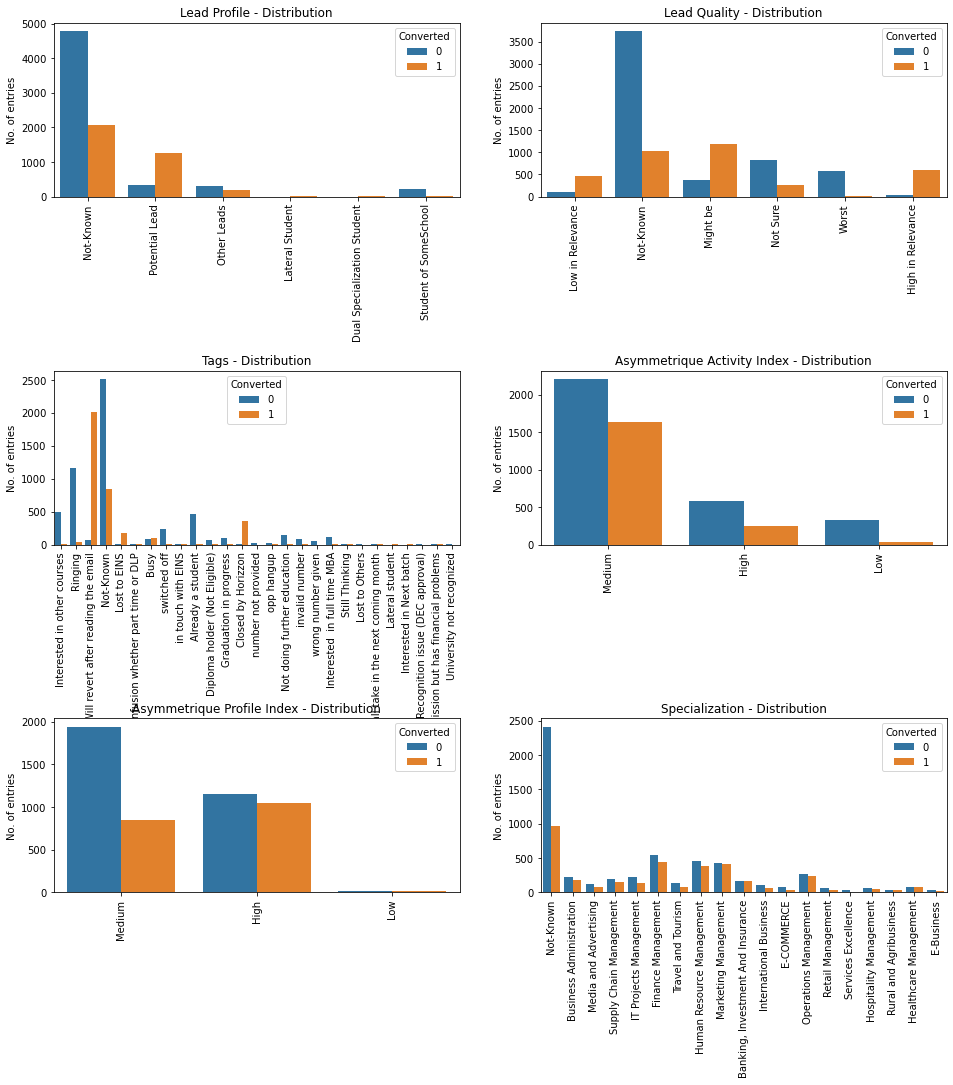

In [38]:
# checking the same for other categorical variables
col_count4=['Lead Profile','Lead Quality','Tags','Asymmetrique Activity Index','Asymmetrique Profile Index','Specialization']

# Visualising the histogram of the distribution of these categorical variables
plt.figure(figsize=(16,16))
for i in range(len(col_count4)):
    plt.subplot(3, 2, i+1)
    var=col_count4[i]
    sns.countplot(x= var, hue = 'Converted', data = data)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 1)

In [39]:
x_df=pd.DataFrame(data['Asymmetrique Profile Index'].value_counts())
x_df.reset_index(inplace=True)
x_df.columns=['Asymmetrique Profile Index','count']
x_df
sums=x_df['count'].sum()
null_len=len(data.loc[data['Asymmetrique Profile Index'].isnull() == True])
i=0
j=0
for p,row in data.loc[data['Asymmetrique Profile Index'].isnull() == True].iterrows():
    data.at[p,'Asymmetrique Profile Index']=x_df['Asymmetrique Profile Index'][i]
    j=j+1
    if round(j/null_len*100,2) >= round(x_df['count'][i]/sums*100,2):
        j=0
        i=i+1

In [40]:
x_df=pd.DataFrame(data['Asymmetrique Activity Index'].value_counts())
x_df.reset_index(inplace=True)
x_df.columns=['Asymmetrique Activity Index','count']
x_df
sums=x_df['count'].sum()
null_len=len(data.loc[data['Asymmetrique Activity Index'].isnull() == True])
i=0
j=0
for p,row in data.loc[data['Asymmetrique Activity Index'].isnull() == True].iterrows():
    data.at[p,'Asymmetrique Activity Index']=x_df['Asymmetrique Activity Index'][i]
    j=j+1
    if round(j/null_len*100,2) >= round(x_df['count'][i]/sums*100,2):
        j=0
        i=i+1

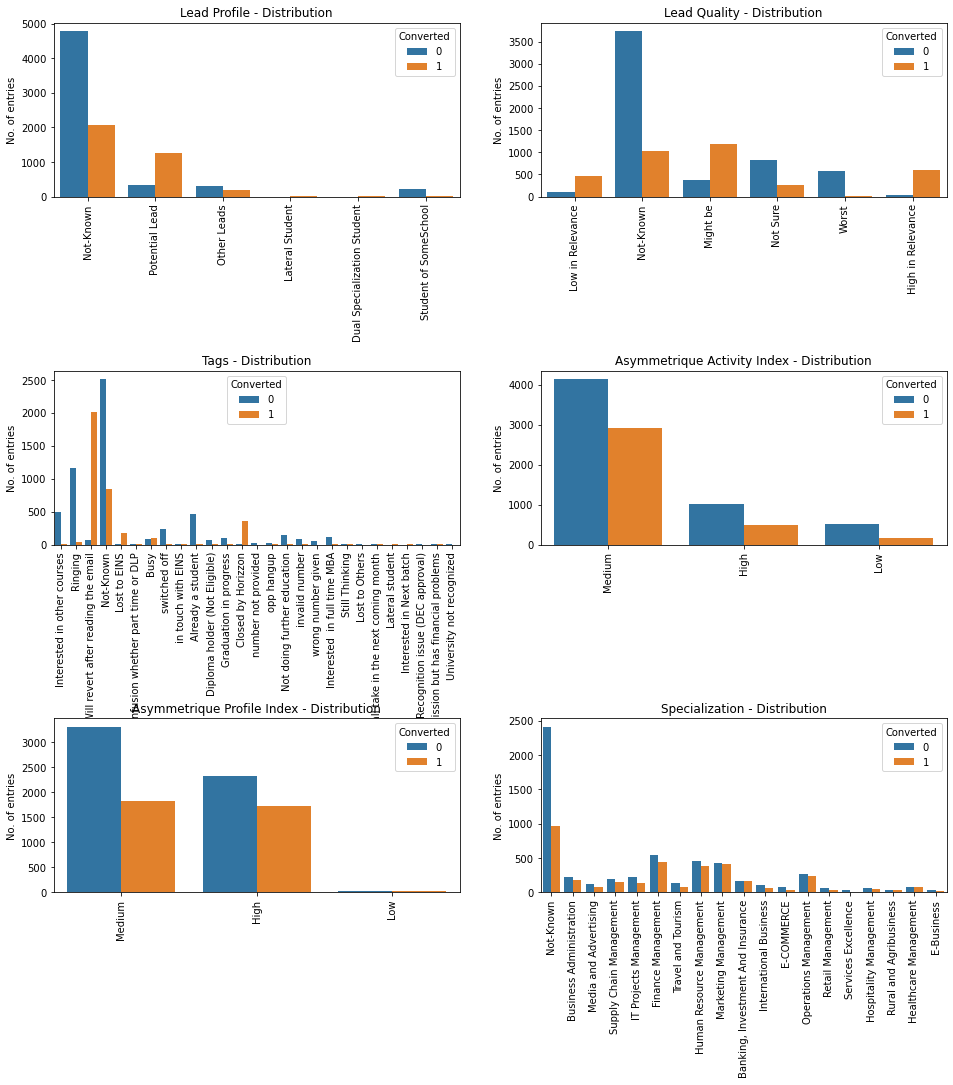

In [41]:
# checking the same for other categorical variables
col_count4=['Lead Profile','Lead Quality','Tags','Asymmetrique Activity Index','Asymmetrique Profile Index','Specialization']

# Visualising the histogram of the distribution of these categorical variables
plt.figure(figsize=(16,16))
for i in range(len(col_count4)):
    plt.subplot(3, 2, i+1)
    var=col_count4[i]
    sns.countplot(x= var, hue = 'Converted', data = data)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 1)

In [42]:
# Check the remaining NULL fields
data_null=round((data.isna().sum())/len(data.index) * 100,2)
print(data_null[data_null > 0])

Series([], dtype: float64)


In [43]:
data.shape

(9240, 25)

In [44]:
# checking for non null categorical variables
print(data['Do Not Email'].value_counts())
print(data['Do Not Call'].value_counts())
print(data['Search'].value_counts())
print(data['Newspaper Article'].value_counts())
print(data['X Education Forums'].value_counts())
print(data['Newspaper'].value_counts())
print(data['Digital Advertisement'].value_counts())
print(data['Through Recommendations'].value_counts())
print(data['A free copy of Mastering The Interview'].value_counts())

No     8506
Yes     734
Name: Do Not Email, dtype: int64
No     9238
Yes       2
Name: Do Not Call, dtype: int64
No     9226
Yes      14
Name: Search, dtype: int64
No     9238
Yes       2
Name: Newspaper Article, dtype: int64
No     9239
Yes       1
Name: X Education Forums, dtype: int64
No     9239
Yes       1
Name: Newspaper, dtype: int64
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64
No     9233
Yes       7
Name: Through Recommendations, dtype: int64
No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64


In [45]:
# Drop the column with heavily single-valued datadont have much vale to data
data=data.drop('Do Not Call',axis=1)
data=data.drop('Search',axis=1)
data=data.drop('Newspaper Article',axis=1)
data=data.drop('X Education Forums',axis=1)
data=data.drop('Newspaper',axis=1)
data=data.drop('Digital Advertisement',axis=1)
data=data.drop('Through Recommendations',axis=1)

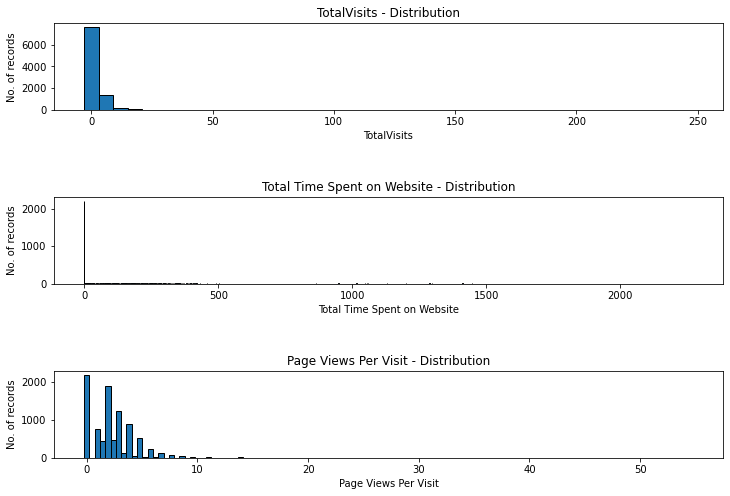

In [46]:
num_vars=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize=(12,8))
for i in range(len(num_vars)):
    plt.subplot(3,1, i+1)
    var=num_vars[i]
    data[var].plot.hist(edgecolor = 'k',bins=(len(data[var].unique())), align='left')
    plt.title(var+' - Distribution')
    plt.xlabel(var)
    plt.ylabel('No. of records')
    plt.subplots_adjust(hspace = 1)    

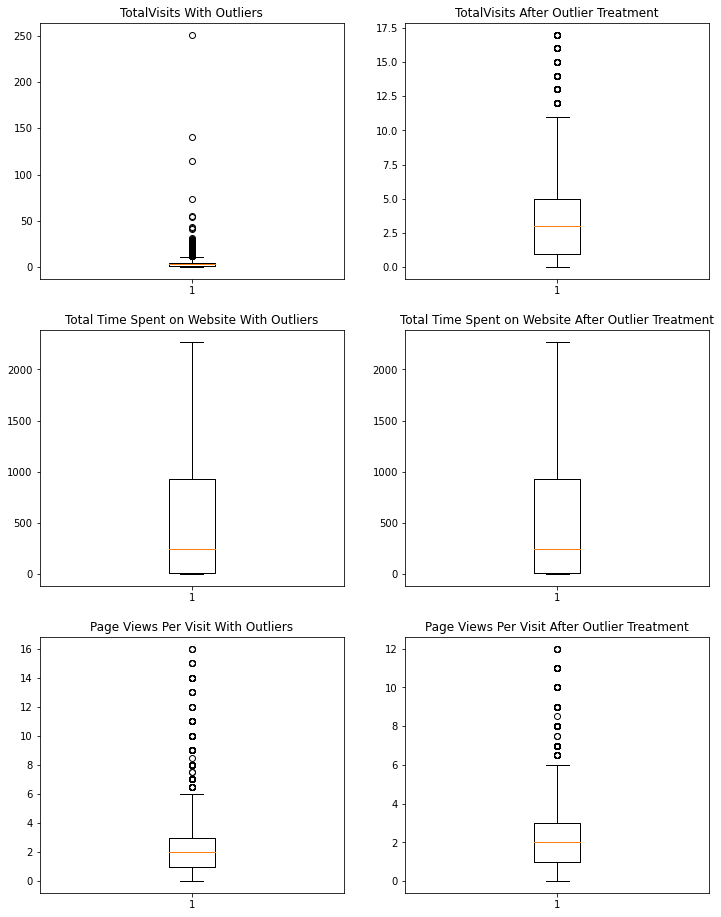

In [47]:
#now we should remove outliers which are present
plt.figure(figsize=(12,16))
num_cols=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
p=0
for j in range(len(num_cols)):
    var=num_cols[j]
    p=p+1
    plt.subplot(3, 2, p)
    plt.title(var+' With Outliers')
    plt.boxplot(data[var])
    Q1 = data[var].quantile(0.05)
    Q3 = data[var].quantile(0.90)
    IQR = Q3 - Q1
    data = data[(data[var] >= Q1 - 1.5*IQR) & (data[var] <= Q3 + 1.5*IQR)]
    p=p+1
    plt.subplot(3, 2, p)
    plt.title(var+' After Outlier Treatment')
    plt.boxplot(data[var])

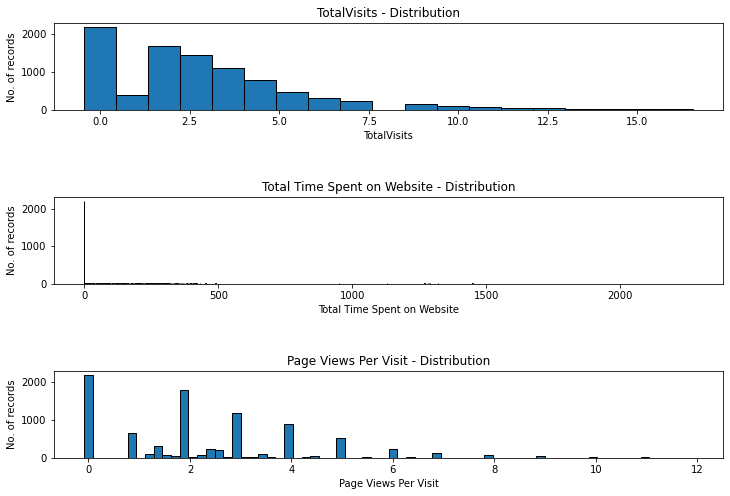

In [48]:
plt.figure(figsize=(12,8))
for i in range(len(num_vars)):
    plt.subplot(3,1, i+1)
    var=num_vars[i]
    data[var].plot.hist(edgecolor = 'k',bins=(len(data[var].unique())), align='left')
    plt.title(var+' - Distribution')
    plt.xlabel(var)
    plt.ylabel('No. of records')
    plt.subplots_adjust(hspace = 1)    

<AxesSubplot:>

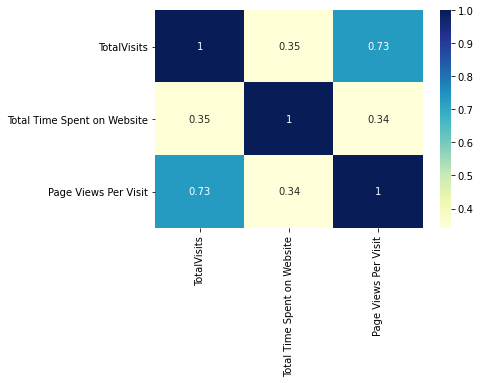

In [49]:
# generating heatmap
sns.heatmap(data[num_cols].corr(),cmap='YlGnBu', annot=True)

In [50]:
# Encoding the categorical variables
Yes_No = ['Do Not Email','A free copy of Mastering The Interview']

for var in Yes_No:
    # Creating dummy variables for category variables
    dummy_df = pd.get_dummies(data[var],prefix=var)
    data = pd.concat([data,dummy_df], axis=1)
    # Dropping the "Yes" entries as they are less in number
    data.drop([var,var+'_Yes'], axis =1 , inplace=True)

data.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Last Notable Activity,Do Not Email_No,A free copy of Mastering The Interview_No
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not-Known,Unemployed,Interested in other courses,Low in Relevance,Not-Known,Medium,Medium,Modified,1,1
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Not-Known,Unemployed,Ringing,Not-Known,Not-Known,Medium,Medium,Email Opened,1,1
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Potential Lead,Medium,High,Email Opened,1,0
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Not-Known,Medium,High,Modified,1,1
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not-Known,Unemployed,Will revert after reading the email,Might be,Not-Known,Medium,High,Modified,1,1


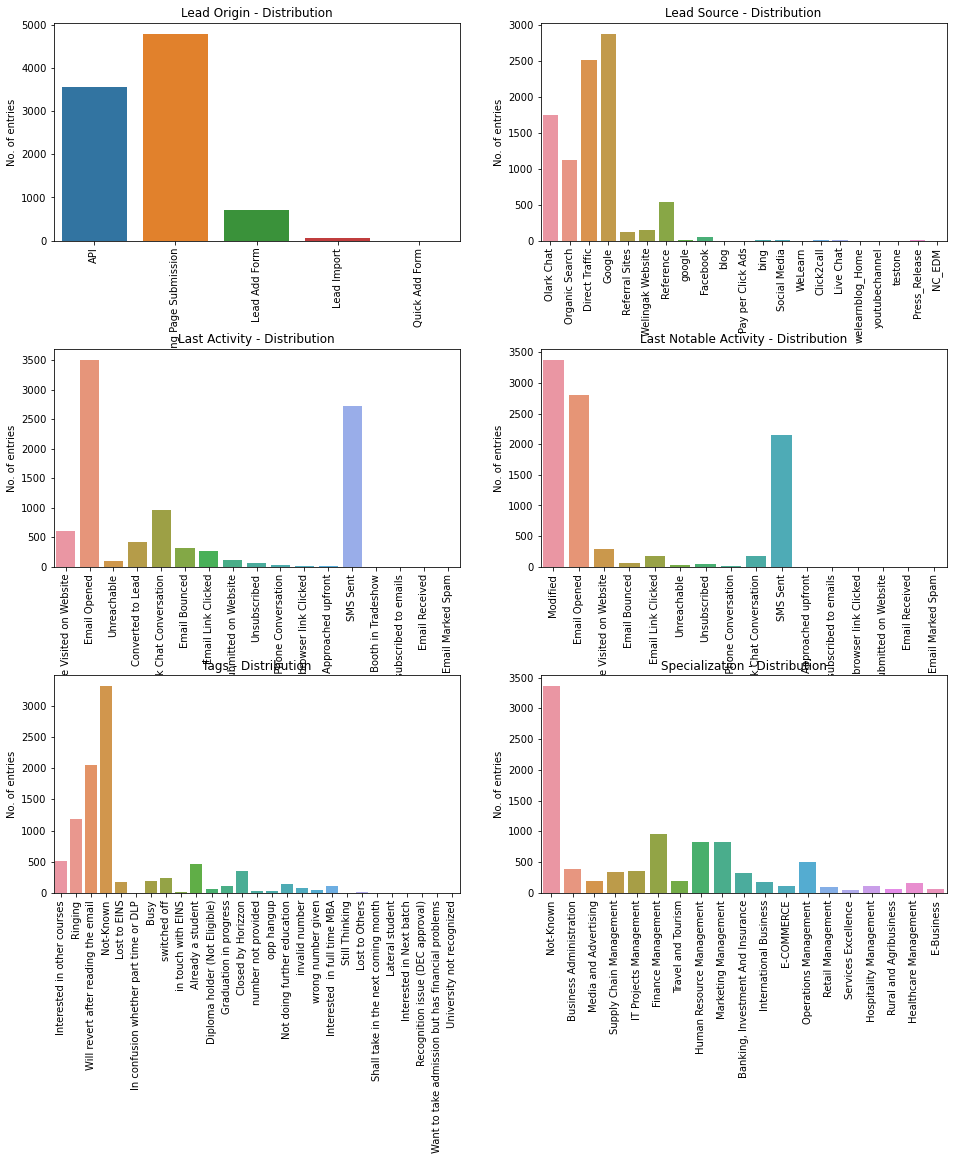

In [51]:
# checking onminor values of categorical variables group into one dummy group
col_category=['Lead Origin','Lead Source','Last Activity','Last Notable Activity','Tags','Specialization']

# Visualising the histogram of the distribution of all categorical variables
plt.figure(figsize=(16,16))
for i in range(len(col_category)):
    plt.subplot(3, 2, i+1)
    var=col_category[i]
    sns.countplot(x=var, data=data)
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 0.5)


In [52]:
# grouping the minor values into single 
for p,row in data.iterrows():
    if data.at[p,'Lead Origin']== 'Quick Add Form':
        data.at[p,'Lead Origin'] = 'Others'
    
    if data.at[p,'Lead Source']== 'google':
        data.at[p,'Lead Source'] = 'Google'
    elif data.at[p,'Lead Source'] in (['blog','Pay per Click Ads','bing','Social Media','WeLearn','Click2call','Live Chat','welearnblog_Home','testone','Press_Release','NC_EDM']):
        data.at[p,'Lead Source'] = 'Others'
    
    if data.at[p,'Last Activity'] in (['Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Marked Spam','Email Received','Visited Booth in Tradeshow']):
        data.at[p,'Last Activity'] = 'Others'
    
    if data.at[p,'Last Notable Activity'] in (['Unreachable','Had a Phone Conversation','Email Marked Spam','Approached upfront','View in browser link Clicked','Email Received','Form Submitted on Website']):
        data.at[p,'Last Notable Activity'] = 'Others'
    
    if data.at[p,'Tags'] in (['wrong number given','opp hangup','number not provided','in touch with EINS','Lost to Others','Want to take admission but has financial problems','Still Thinking','Interested in Next batch','In confusion whether part time or DLP','Lateral student','University not recognized','Shall take in the next coming month','Recognition issue (DEC approval)']):
        data.at[p,'Tags'] = 'Others'
        
print(data['Lead Origin'].value_counts())
print(data['Lead Source'].value_counts())
print(data['Last Activity'].value_counts())
print(data['Last Notable Activity'].value_counts())
print(data['Tags'].value_counts())

Landing Page Submission    4803
API                        3560
Lead Add Form               717
Lead Import                  55
Others                        1
Name: Lead Origin, dtype: int64
Google              2887
Direct Traffic      2507
Olark Chat          1753
Organic Search      1116
Reference            533
Welingak Website     142
Referral Sites       120
Facebook              55
Others                22
youtubechannel         1
Name: Lead Source, dtype: int64
Email Opened                 3509
SMS Sent                     2724
Olark Chat Conversation       969
Page Visited on Website       600
Converted to Lead             428
Email Bounced                 325
Email Link Clicked            266
Form Submitted on Website     114
Unreachable                    91
Unsubscribed                   61
Others                         48
Resubscribed to emails          1
Name: Last Activity, dtype: int64
Modified                   3380
Email Opened               2800
SMS Sent            

In [53]:
# creating the dummy variable and drop others
col_category=['Lead Origin','Lead Source','Last Activity','Last Notable Activity']

for var in col_category:
    # Creating dummy variables for category variables
    dummy_df = pd.get_dummies(data[var],prefix=var)
    data = pd.concat([data,dummy_df], axis=1)
    # Dropping the Others entries as they are less in number
    data.drop([var,var+'_Others'], axis =1 , inplace=True)

data.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Tags,Lead Quality,Lead Profile,...,Last Activity_Unsubscribed,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
0,660737,0,0.0,0,0.0,Not-Known,Unemployed,Interested in other courses,Low in Relevance,Not-Known,...,0,0,0,0,1,0,0,0,0,0
1,660728,0,5.0,674,2.5,Not-Known,Unemployed,Ringing,Not-Known,Not-Known,...,0,0,0,1,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,Business Administration,Student,Will revert after reading the email,Might be,Potential Lead,...,0,0,0,1,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,Media and Advertising,Unemployed,Ringing,Not Sure,Not-Known,...,0,0,0,0,1,0,0,0,0,0
4,660681,1,2.0,1428,1.0,Not-Known,Unemployed,Will revert after reading the email,Might be,Not-Known,...,0,0,0,0,1,0,0,0,0,0


In [54]:
col_category2=['Specialization','What is your current occupation','Tags','Lead Quality','Lead Profile']

for var in col_category2:
    # Creating dummy variables for category variables
    dummy_df = pd.get_dummies(data[var],prefix=var)
    data = pd.concat([data,dummy_df], axis=1)
    # Dropping the Others entries as they are less in number
    data.drop([var,var+'_Not-Known'], axis =1 , inplace=True)
    if var == 'Tags':
        data.drop([var+'_Others'], axis =1 , inplace=True)
        

data.head()


,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Index,Asymmetrique Profile Index,Do Not Email_No,A free copy of Mastering The Interview_No,Lead Origin_API,...,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool
0,660737,0,0.0,0,0.0,Medium,Medium,1,1,1,...,0,1,0,0,0,0,0,0,0,0
1,660728,0,5.0,674,2.5,Medium,Medium,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,Medium,High,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,660719,0,1.0,305,1.0,Medium,High,1,1,0,...,0,0,0,1,0,0,0,0,0,0
4,660681,1,2.0,1428,1.0,Medium,High,1,1,0,...,0,0,1,0,0,0,0,0,0,0


In [55]:
# Dummy Variables for Index columns
col_category3=['Asymmetrique Activity Index','Asymmetrique Profile Index']

for var in col_category3:
    # Creating dummy variables for category variables
    dummy_df = pd.get_dummies(data[var],prefix=var)
    data = pd.concat([data,dummy_df], axis=1)
    # Dropping the Others entries as they are less in number
    data.drop([var,var+'_Low'], axis =1 , inplace=True)

data.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email_No,A free copy of Mastering The Interview_No,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Lead Quality_Worst,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_High,Asymmetrique Activity Index_Medium,Asymmetrique Profile Index_High,Asymmetrique Profile Index_Medium
0,660737,0,0.0,0,0.0,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,660728,0,5.0,674,2.5,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,660727,1,2.0,1532,2.0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0
3,660719,0,1.0,305,1.0,1,1,0,1,0,...,0,0,0,0,0,0,0,1,1,0
4,660681,1,2.0,1428,1.0,1,1,0,1,0,...,0,0,0,0,0,0,0,1,1,0


In [56]:
data.shape

(9136, 91)

In [57]:
# spliting the dataset
X=data.drop(['Lead Number','Converted'], axis =1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email_No,A free copy of Mastering The Interview_No,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Lead Quality_Worst,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_High,Asymmetrique Activity Index_Medium,Asymmetrique Profile Index_High,Asymmetrique Profile Index_Medium
0,0.0,0,0.0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,5.0,674,2.5,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,2.0,1532,2.0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,1,1,0
3,1.0,305,1.0,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
4,2.0,1428,1.0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [58]:
#y var
y = data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [59]:
# test and train to 3:7 ratio
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)


In [60]:
#scalling numerical values
num_vars= ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

scaler = StandardScaler()

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email_No,A free copy of Mastering The Interview_No,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Lead Quality_Worst,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_High,Asymmetrique Activity Index_Medium,Asymmetrique Profile Index_High,Asymmetrique Profile Index_Medium
7896,-0.403755,1.306686,-0.155294,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
8701,-0.749397,0.200127,-0.666771,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
6665,0.287530,1.561341,0.867658,1,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
8087,-1.095040,-0.888112,-1.178247,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
2466,0.287530,-0.545519,-0.155294,1,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1


In [61]:
#logestic regression model building
logm1=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6395
Model:                            GLM   Df Residuals:                     6306
Model Family:                Binomial   Df Model:                           88
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 10 Aug 2023   Deviance:                          nan
Time:                        00:38:54   Pearson chi2:                 2.42e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 2.865e+15   7.29e+07   3.93e+07      0.000    2.87e+15    2.87e+15
TotalVisits                                           6.433e+13   1.35e+06   4.75e+07      0.000    6.43e+13    6.43e+13
Total Time Spent on Website                           1.141e+14   1.02e+06   1.12e+08      0.000    1.14e+14    1.14e+14
Page Views Per Visit                                 -3.942e+13   1.43e+06  -2.76e+07      0.000   -3.94e+13   -3.94e+13
Do Not Email_No                                       1.263e+14   4.56e+06   2.77e+07      0.000    1.26e+14    1.26e+14
A free copy of Mastering The Interview_No             1.537e+13   2.73e+06   5.63e+06      0.000    1.54e+13    1.54e+13
Lead Origin_API                                      -4.148e+15   6.79e+07  -6.11e+07      0.000   -4.15e+15   -4.15e+15
Lead Origin_Landing Page Submission                  -4.288e+15   6.79e+07  -6.32e+07      0.000   -4.29e+15   -4.29e+15
Lead Origin_Lead Add Form                            -3.908e+15   6.91e+07  -5.66e+07      0.000   -3.91e+15   -3.91e+15
Lead Origin_Lead Import                               1.311e+15   9.65e+07   1.36e+07      0.000    1.31e+15    1.31e+15
Lead Source_Direct Traffic                            5.576e+14   1.83e+07   3.05e+07      0.000    5.58e+14    5.58e+14
Lead Source_Facebook                                 -5.256e+15   7.03e+07  -7.48e+07      0.000   -5.26e+15   -5.26e+15
Lead Source_Google                                     6.62e+14   1.82e+07   3.64e+07      0.000    6.62e+14    6.62e+14
Lead Source_Olark Chat                                1.007e+15   1.85e+07   5.45e+07      0.000    1.01e+15    1.01e+15
Lead Source_Organic Search                            5.945e+14   1.83e+07   3.24e+07      0.000    5.95e+14    5.95e+14
Lead Source_Reference                                 4.618e+13   2.15e+07   2.15e+06      0.000    4.62e+13    4.62e+13
Lead Source_Referral Sites                              7.2e+14   1.96e+07   3.67e+07      0.000     7.2e+14     7.2e+14
Lead Source_Welingak Website                          6.211e+14   2.22e+07    2.8e+07      0.000    6.21e+14    6.21e+14
Lead Source_youtubechannel                           -3.119e+15   7.06e+07  -4.42e+07      0.000   -3.12e+15   -3.12e+15
Last Activity_Converted to Lead                      -2.822e+14   1.27e+07  -2.21e+07      0.000   -2.82e+14   -2.82e+14
Last Activity_Email Bounced                          -5.104e+14   1.36e+07  -3.75e+07      0.000    -5.1e+14    -5.1e+14
Last Activity_Email Link Clicked                     -4.082e+14   1.48e+07  -2.76e+07      0.000   -4.08e+14   -4.08e+14
Last Activity_Email Opened                           -2.19

In [62]:
# implementing RFE
logistic=LogisticRegression()
rfe=RFE(logistic,15)
rfe=rfe.fit(X_train,y_train)

In [63]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False])

In [64]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 44),
 ('Total Time Spent on Website', False, 11),
 ('Page Views Per Visit', False, 43),
 ('Do Not Email_No', False, 17),
 ('A free copy of Mastering The Interview_No', False, 54),
 ('Lead Origin_API', False, 36),
 ('Lead Origin_Landing Page Submission', False, 28),
 ('Lead Origin_Lead Add Form', False, 9),
 ('Lead Origin_Lead Import', False, 56),
 ('Lead Source_Direct Traffic', False, 42),
 ('Lead Source_Facebook', False, 34),
 ('Lead Source_Google', False, 48),
 ('Lead Source_Olark Chat', False, 10),
 ('Lead Source_Organic Search', False, 47),
 ('Lead Source_Reference', False, 16),
 ('Lead Source_Referral Sites', False, 38),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_youtubechannel', False, 60),
 ('Last Activity_Converted to Lead', False, 27),
 ('Last Activity_Email Bounced', False, 35),
 ('Last Activity_Email Link Clicked', False, 45),
 ('Last Activity_Email Opened', False, 49),
 ('Last Activity_Form Submitted on Website', False, 72),
 ('Last A

In [65]:
col = X_train.columns[rfe.support_]
col

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Unemployed', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Lead Quality_Worst'],
      dtype='object')

In [66]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Do Not Email_No', 'A free copy of Mastering The Interview_No',
       'Lead Origin_API', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email

In [67]:
# building columns which are in rfe.support_
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6395
Model:                            GLM   Df Residuals:                     6379
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1424.0
Date:                Thu, 10 Aug 2023   Deviance:                       2847.9
Time:                        00:42:04   Pearson chi2:                 1.15e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -2.5302      0.086    -29.320      0.000      -2.699      -2.361
Lead Source_Welingak Website                   3.6438      0.729      4.996      0.000       2.214       5.073
Last Activity_SMS Sent                         1.9719      0.105     18.828      0.000       1.767       2.177
What is your current occupation_Unemployed     1.6845      0.106     15.945      0.000       1.477       1.892
Tags_Already a student                        -3.0109      0.597     -5.042      0.000      -4.181      -1.841
Tags_Closed by Horizzon                        6.2793      0.717      8.761      0.000       4.875       7.684
Tags_Diploma holder (Not Eligible)            -2.7474      1.029     -2.670      0.008      -4.764      -0.731
Tags_Interested  in full time MBA             -2.3547      0.608     -3.876      0.000      -3.546      -1.164
Tags_Interested in other courses              -3.2260      0.425     -7.585      0.000      -4.060      -2.392
Tags_Lost to EINS                              5.6317      0.628      8.968      0.000       4.401       6.862
Tags_Not doing further education              -3.4295      1.029     -3.334      0.001      -5.446      -1.413
Tags_Ringing                                  -3.7995      0.225    -16.871      0.000      -4.241      -3.358
Tags_Will revert after reading the email       4.4577      0.168     26.553      0.000       4.129       4.787
Tags_invalid number                           -3.9896      1.025     -3.894      0.000      -5.998      -1.981
Tags_switched off                             -4.5234      0.593     -7.625      0.000      -5.686      -3.361
Lead Quality_Worst                            -2.6947      0.617     -4.366      0.000      -3.904      -1.485
==============================================================================================================
"""

In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
9,Tags_Not doing further education,1.22
13,Tags_switched off,1.15
4,Tags_Closed by Horizzon,1.10
6,Tags_Interested in full time MBA,1.10
0,Lead Source_Welingak Website,1.07
5,Tags_Diploma holder (Not Eligible),1.06
12,Tags_invalid number,1.06
8,Tags_Lost to EINS,1.04
14,Lead Quality_Worst,0.72
3,Tags_Already a student,0.34


In [69]:
#dropping high p value columns
col=col.drop('Tags_invalid number',1)

col

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Unemployed', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Worst'],
      dtype='object')

In [70]:
#again model building
X_train_sm = sm.add_constant(X_train[col])
logm3=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6395
Model:                            GLM   Df Residuals:                     6380
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1449.4
Date:                Thu, 10 Aug 2023   Deviance:                       2898.8
Time:                        00:46:22   Pearson chi2:                 1.12e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -2.5264      0.086    -29.432      0.000      -2.695      -2.358
Lead Source_Welingak Website                   3.7602      0.729      5.158      0.000       2.331       5.189
Last Activity_SMS Sent                         1.9471      0.103     18.860      0.000       1.745       2.149
What is your current occupation_Unemployed     1.5692      0.104     15.120      0.000       1.366       1.773
Tags_Already a student                        -2.8696      0.596     -4.817      0.000      -4.037      -1.702
Tags_Closed by Horizzon                        6.3157      0.716      8.817      0.000       4.912       7.720
Tags_Diploma holder (Not Eligible)            -2.6257      1.029     -2.553      0.011      -4.642      -0.610
Tags_Interested  in full time MBA             -2.2314      0.607     -3.676      0.000      -3.421      -1.042
Tags_Interested in other courses              -3.1059      0.425     -7.313      0.000      -3.938      -2.273
Tags_Lost to EINS                              5.7472      0.639      8.999      0.000       4.496       6.999
Tags_Not doing further education              -3.2898      1.028     -3.199      0.001      -5.305      -1.274
Tags_Ringing                                  -3.6687      0.224    -16.394      0.000      -4.107      -3.230
Tags_Will revert after reading the email       4.5019      0.167     26.909      0.000       4.174       4.830
Tags_switched off                             -4.3910      0.593     -7.409      0.000      -5.553      -3.230
Lead Quality_Worst                            -2.9991      0.580     -5.170      0.000      -4.136      -1.862
==============================================================================================================
"""

In [71]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Tags_Not doing further education,1.21
12,Tags_switched off,1.14
4,Tags_Closed by Horizzon,1.09
6,Tags_Interested in full time MBA,1.09
0,Lead Source_Welingak Website,1.07
5,Tags_Diploma holder (Not Eligible),1.05
8,Tags_Lost to EINS,1.03
13,Lead Quality_Worst,0.71
3,Tags_Already a student,0.33
7,Tags_Interested in other courses,0.33


In [72]:
#prediction of y-pred
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [73]:
y_train_pred[:10]

array([0.00969962, 0.96160982, 0.87819593, 0.87819593, 0.00969962,
       0.00969962, 0.07402674, 0.07402674, 0.00969962, 0.00108399])

In [74]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Index'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Index
0,0,0.009700,7896
1,1,0.961610,8701
2,1,0.878196,6665
3,1,0.878196,8087
4,0,0.009700,2466


In [75]:
#adding precision
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final['Conversion_Prob%'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100,2))

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Index,predicted,Conversion_Prob%
0,0,0.009700,7896,0,0.97
1,1,0.961610,8701,1,96.16
2,1,0.878196,6665,1,87.82
3,1,0.878196,8087,1,87.82
4,0,0.009700,2466,0,0.97


In [77]:
#creating conf matrix
import sklearn.metrics as metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)
print(confusion)

[[3847  137]
 [ 413 1998]]


In [78]:
#accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted))


0.9139953088350273


In [79]:
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]
TP=confusion[1,1]

In [80]:
# SENSITIVITY
print("Sensitivity:",round(100*(TP/float(FN+TP)),2),"%")

Sensitivity: 82.87 %


In [81]:
# SPECIFICITY
print("Specificity:",round(100*(TN/float(TN+FP)),2),"%")

Specificity: 96.56 %


In [82]:
# FALSE POSITIVE RATE
print("FPR:",round(100*(FP/float(FP+TN)),2),"%")

FPR: 3.44 %


In [83]:
# FALSE NEGATIVE RATE
print("FPR:",round(100*(FN/float(FN+TP)),2),"%")


FPR: 17.13 %


In [84]:
# positive predictive value
print("Positive Predictive Power:",round(100*(TP/float(TP+FP)),2),"%")

Positive Predictive Power: 93.58 %


In [85]:
# negative predictive value
print("Negative Predictive Power:",round(100*(TN/float(TN+FN)),2),"%")


Negative Predictive Power: 90.31 %


In [86]:
# ACCURACY SCORE
print("ACCURACY SCORE:",round(100*((TP+TN)/(TP+TN+FP+FN)),2),"%")

ACCURACY SCORE: 91.4 %


In [88]:
#plotting ROC curve

def draw_roc(actual,probs):
    fpr,tpr,thresholds=metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

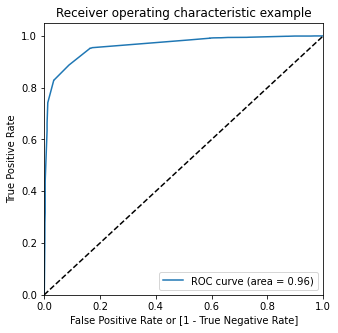

In [89]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [90]:
# creating columns with diff prob
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Index,predicted,Conversion_Prob%,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.009700,7896,0,0.97,1,0,0,0,0,0,0,0,0,0
1,1,0.961610,8701,1,96.16,1,1,1,1,1,1,1,1,1,1
2,1,0.878196,6665,1,87.82,1,1,1,1,1,1,1,1,1,0
3,1,0.878196,8087,1,87.82,1,1,1,1,1,1,1,1,1,0
4,0,0.009700,2466,0,0.97,1,0,0,0,0,0,0,0,0,0


In [92]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.377013  1.000000  0.000000
0.1   0.1  0.875684  0.954791  0.827811
0.2   0.2  0.879124  0.952302  0.834839
0.3   0.3  0.902267  0.887599  0.911145
0.4   0.4  0.913995  0.828702  0.965612
0.5   0.5  0.913995  0.828702  0.965612
0.6   0.6  0.913839  0.828287  0.965612
0.7   0.7  0.913995  0.828287  0.965863
0.8   0.8  0.894762  0.742016  0.987199
0.9   0.9  0.866302  0.662381  0.989709


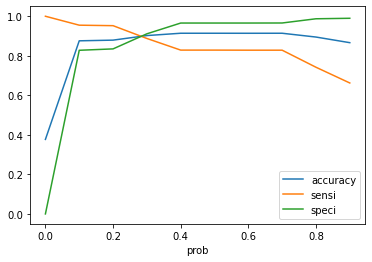

In [93]:
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

In [94]:
# re calculate final pred values using 0.4 thres
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Index,predicted,Conversion_Prob%,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.009700,7896,0,0.97,1,0,0,0,0,0,0,0,0,0,0
1,1,0.961610,8701,1,96.16,1,1,1,1,1,1,1,1,1,1,1
2,1,0.878196,6665,1,87.82,1,1,1,1,1,1,1,1,1,0,1
3,1,0.878196,8087,1,87.82,1,1,1,1,1,1,1,1,1,0,1
4,0,0.009700,2466,0,0.97,1,0,0,0,0,0,0,0,0,0,0


In [95]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)


0.9139953088350273

In [96]:
# accuracy in %
print("ACCURACY:",round(100*((TP+TN)/(TP+TN+FP+FN)),2),"%")

ACCURACY: 91.4 %


In [97]:
# testing data pred
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [98]:
X_test = X_test[col]
X_test.head()

,Lead Source_Welingak Website,Last Activity_SMS Sent,What is your current occupation_Unemployed,Tags_Already a student,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Worst
5499,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1867,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8284,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3522,0,1,1,0,0,0,0,0,0,0,0,1,0,0
7786,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [100]:
# adding constants
X_test_sm = sm.add_constant(X_test)

In [101]:
# creating y-test prediction 
y_test_pred = res.predict(X_test_sm)


In [102]:
# converting to dataframe
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
5499,0.971931
1867,0.277426
8284,0.971931
3522,0.995896
7786,0.074027


In [103]:
# converting y_test to dF
y_test_df = pd.DataFrame(y_test)
# Putting index as Lead Index
y_test_df['Lead Index'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [104]:
# appending both
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Lead Index,0
0,1,5499,0.971931
1,1,1867,0.277426
2,1,8284,0.971931
3,1,3522,0.995896
4,0,7786,0.074027


In [105]:
#renaming
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
# head of y_pred_final
y_pred_final.head()

,Converted,Lead Index,Converted_Prob
0,1,5499,0.971931
1,1,1867,0.277426
2,1,8284,0.971931
3,1,3522,0.995896
4,0,7786,0.074027


In [107]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_pred_final['Conversion_Prob%'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100,2))

# Let's see the head
y_pred_final.head()

,Converted,Lead Index,Converted_Prob,final_predicted,Conversion_Prob%
0,1,5499,0.971931,1,97.19
1,1,1867,0.277426,0,27.74
2,1,8284,0.971931,1,97.19
3,1,3522,0.995896,1,99.59
4,0,7786,0.074027,0,7.40


In [108]:
# overallaccuracy of test data set
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9058737686975556

In [109]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test

array([[1580,   55],
       [ 203,  903]], dtype=int64)

In [110]:
print("Accuracy of the Test Data Predictions:",round(100*(metrics.accuracy_score(y_pred_final.Converted,y_pred_final.final_predicted)),2),"%")

Accuracy of the Test Data Predictions: 90.59 %


In [111]:
print("Precision Score of the Test Data Predictions:",round(100*(precision_score(y_pred_final.Converted, y_pred_final.final_predicted)),2),"%")
print("Recall Score of the Test Data Predictions:",round(100*(recall_score(y_pred_final.Converted, y_pred_final.final_predicted)),2),"%")

Precision Score of the Test Data Predictions: 94.26 %
Recall Score of the Test Data Predictions: 81.65 %
